In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load the image

In [2]:
image = cv2.imread('./image.jpeg')

### Brighten

In [3]:
value = 30
brightened = cv2.convertScaleAbs(image, alpha=1, beta=value)


### Add Noise

In [4]:
row, col, ch = image.shape
mean = 0
sigma = 25
gauss = np.random.normal(mean, sigma, (row, col, ch))
noisy = image + gauss.reshape(row, col, ch)
noisy = np.clip(noisy, 0, 255).astype(np.uint8)

### Change Contrast

In [5]:
alpha = 1.5
beta = 0
contrasted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

### Blur

In [6]:
ksize = (5, 5)
blurred = cv2.GaussianBlur(image, ksize, 0)

### Sharpen

In [7]:

kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel)

### Edge Detect

In [8]:
edges = cv2.Canny(image, 100, 200)

### Upscaling

In [9]:
scale = 2
height, width = image.shape[:2]
upscaled = cv2.resize(image, (width * scale, height * scale), interpolation=cv2.INTER_LINEAR)

### Downscaling

In [10]:
downscaled = cv2.resize(image, (width // scale, height // scale), interpolation=cv2.INTER_AREA)

### Composite example with upscaled image

In [12]:
upscaled_to_original_size = cv2.resize(upscaled, (width, height), interpolation=cv2.INTER_LINEAR)
alpha = 0.5
composite_image = cv2.addWeighted(image, alpha, upscaled_to_original_size, 1 - alpha, 0)

### Display results

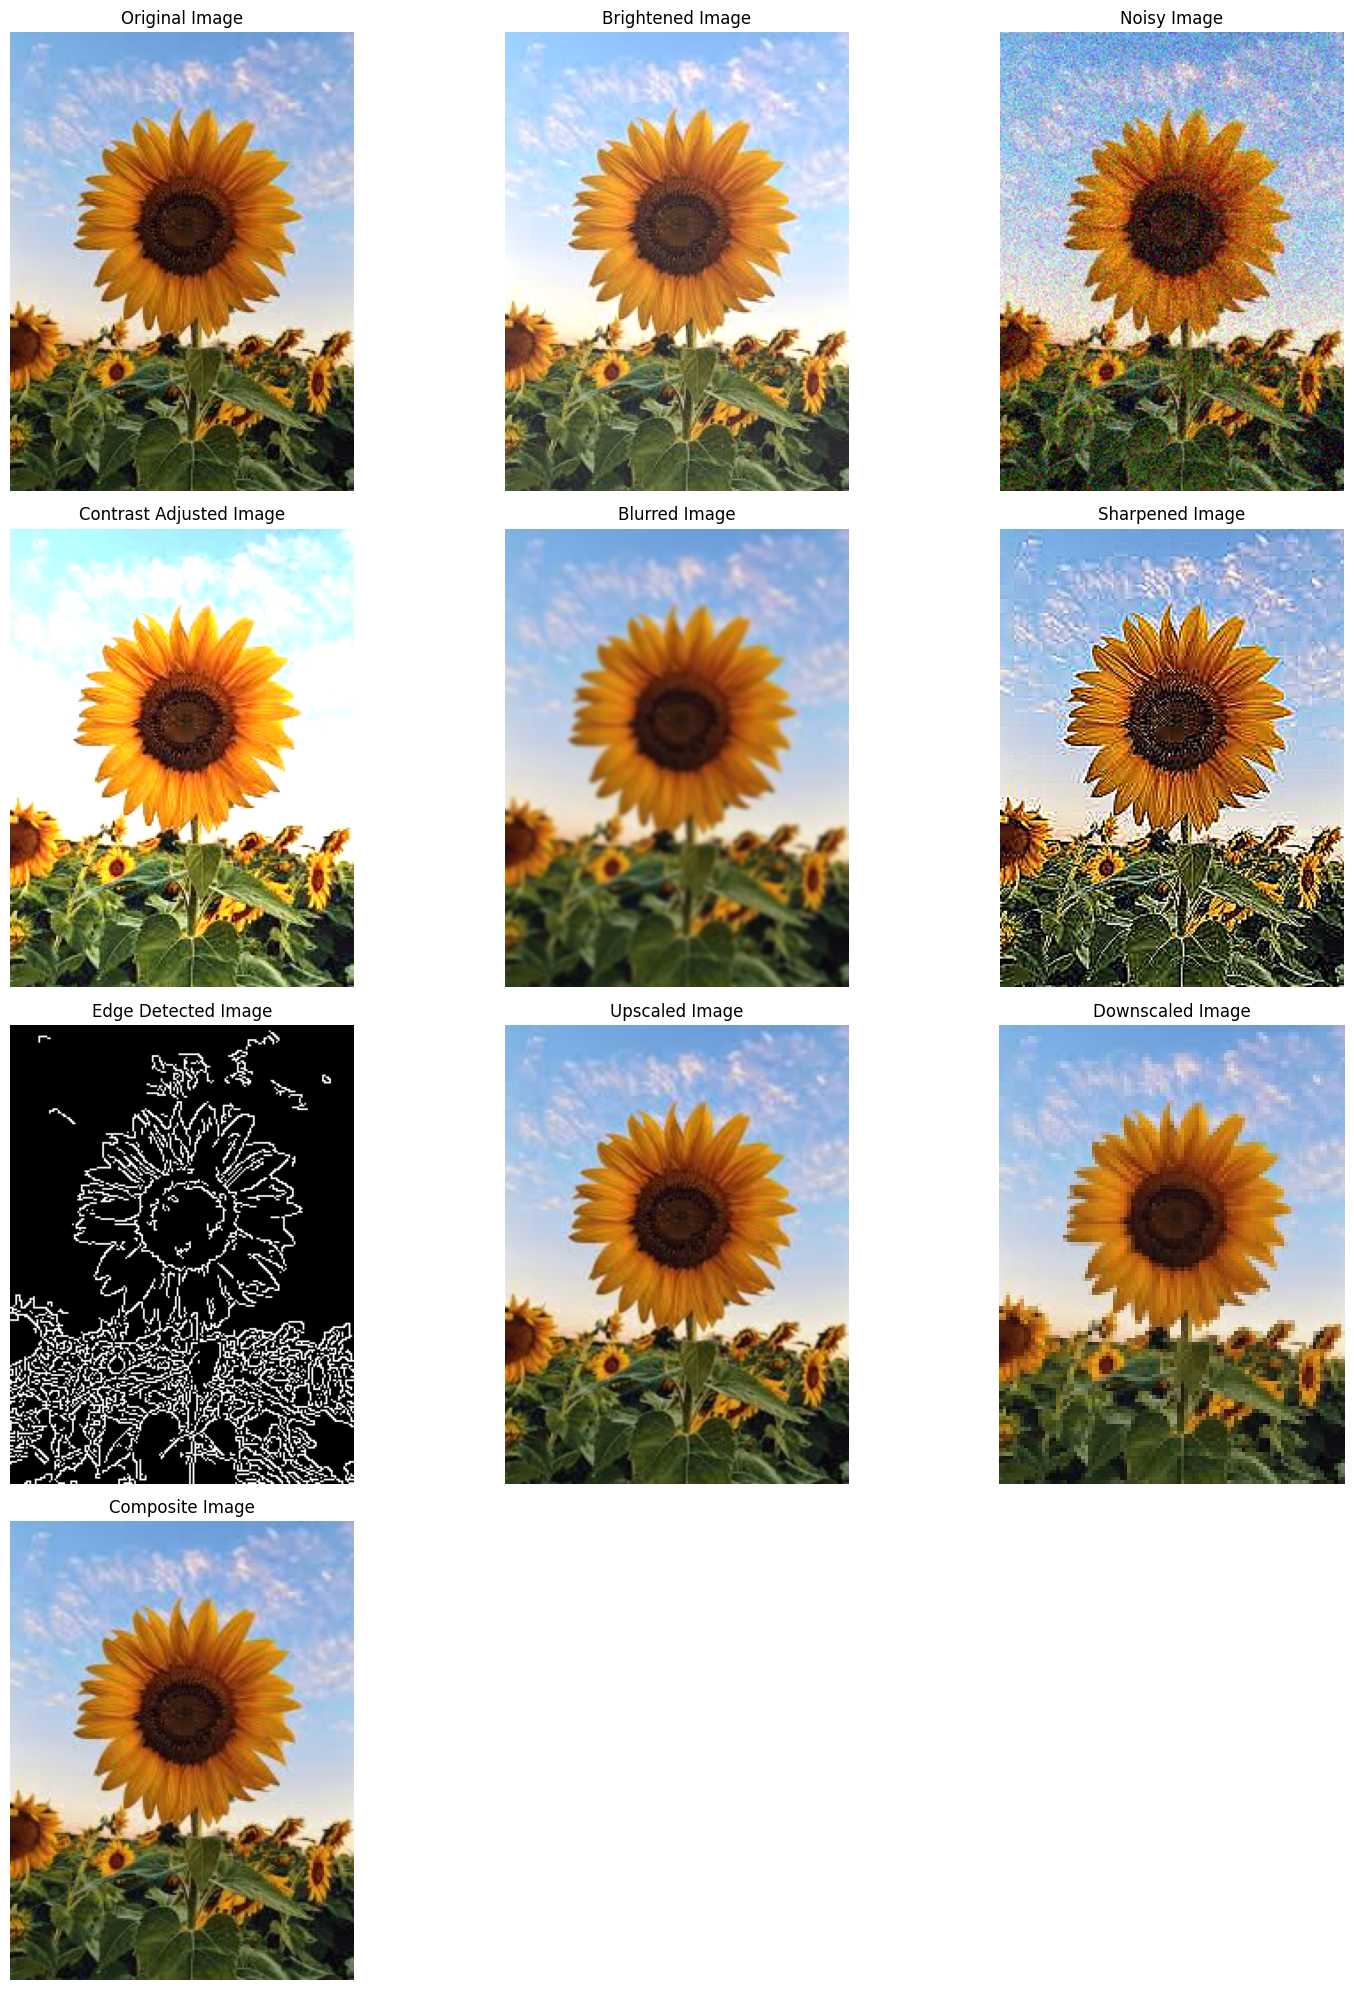

In [15]:
# List of images and titles
images = [
    image, brightened, noisy, contrasted, blurred, 
    sharpened, edges, upscaled, downscaled, composite_image
]
titles = [
    'Original Image', 'Brightened Image', 'Noisy Image', 
    'Contrast Adjusted Image', 'Blurred Image', 'Sharpened Image', 
    'Edge Detected Image', 'Upscaled Image', 'Downscaled Image', 
    'Composite Image'
]

# Display results
def show_images(images, titles):
    n = len(images)
    rows = (n // 3) + (1 if n % 3 else 0)
    
    plt.figure(figsize=(15, 5 * rows))
    for i in range(n):
        plt.subplot(rows, 3, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    

show_images(images, titles)